In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# for better plot
plt.style.use("ggplot")
sns.set_theme()

In [7]:
#load dataset with the needed cols
btc_df = pd.read_csv("archive/coin_Bitcoin.csv", usecols=["Date", "Close", "Volume"])
eth_df = pd.read_csv("archive/coin_Ethereum.csv", usecols=["Date", "Close", "Volume"])
bnb_df = pd.read_csv("archive/coin_BinanceCoin.csv", usecols=["Date", "Close", "Volume"])
ada_df = pd.read_csv("archive/coin_Cardano.csv", usecols=["Date", "Close", "Volume"])
sol_df = pd.read_csv("archive/coin_Solana.csv", usecols=["Date", "Close", "Volume"])

In [8]:
#convert date  columns for all table
for df in [btc_df, eth_df, bnb_df, ada_df, sol_df]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True) # sort by date

In [9]:
#Renaming columns before merging to avoid duplicate
btc = btc_df.rename(columns={"Close": "btc_close", "Volume": "btc_volume"})
eth = eth_df.rename(columns={"Close": "eth_close", "Volume": "eth_volume"})
bnb = bnb_df.rename(columns={"Close": "bnb_close", "Volume": "bnb_volume"})
ada = ada_df.rename(columns={"Close": "ada_close", "Volume": "ada_volume"})
sol = sol_df.rename(columns={"Close": "sol_close", "Volume": "sol_volume"})

In [10]:
#merged the table like an 'inner join' on date as the PK
merged = btc.merge(eth, on="Date", how="inner")\
    .merge(sol, on="Date", how="inner")\
        .merge(ada, on="Date", how="inner")\
            .merge(bnb, on="Date", how="inner")

print(merged.head(10))

                 Date    btc_close    btc_volume   eth_close    eth_volume  \
0 2020-04-11 23:59:59  6859.082963  3.122209e+10  158.216024  1.355509e+10   
1 2020-04-12 23:59:59  6971.091591  3.575957e+10  161.142420  1.512372e+10   
2 2020-04-13 23:59:59  6845.037697  3.861931e+10  156.279549  1.646528e+10   
3 2020-04-14 23:59:59  6842.427861  3.411043e+10  157.596396  1.472316e+10   
4 2020-04-15 23:59:59  6642.109893  3.228831e+10  153.286893  1.417175e+10   
5 2020-04-16 23:59:59  7116.804218  4.678324e+10  172.157383  2.291047e+10   
6 2020-04-17 23:59:59  7096.184659  3.251342e+10  171.638583  1.671468e+10   
7 2020-04-18 23:59:59  7257.664858  3.244719e+10  186.914006  2.016032e+10   
8 2020-04-19 23:59:59  7189.424824  3.131121e+10  181.614959  1.914604e+10   
9 2020-04-20 23:59:59  6881.958693  3.774711e+10  172.297158  2.126668e+10   

   sol_close    sol_volume  ada_close    ada_volume  bnb_close    bnb_volume  
0   0.776819  4.386244e+07   0.033354  7.564811e+07  13.804288

In [11]:
print(merged.shape) #rows and cols
print(merged.info())# datatype

(452, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        452 non-null    datetime64[ns]
 1   btc_close   452 non-null    float64       
 2   btc_volume  452 non-null    float64       
 3   eth_close   452 non-null    float64       
 4   eth_volume  452 non-null    float64       
 5   sol_close   452 non-null    float64       
 6   sol_volume  452 non-null    float64       
 7   ada_close   452 non-null    float64       
 8   ada_volume  452 non-null    float64       
 9   bnb_close   452 non-null    float64       
 10  bnb_volume  452 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 39.0 KB
None


In [12]:
print(merged.describe())# basic statistic

                                Date     btc_close    btc_volume    eth_close  \
count                            452    452.000000  4.520000e+02   452.000000   
mean   2020-11-23 11:59:58.999999744  26022.869064  4.352796e+10  1067.855486   
min              2020-04-11 23:59:59   6642.109893  1.225260e+10   153.286893   
25%              2020-08-02 17:59:59  10312.904774  2.668280e+10   337.016604   
50%              2020-11-23 11:59:59  17937.996797  3.917444e+10   528.515487   
75%              2021-03-16 05:59:59  38504.221061  5.585637e+10  1813.440387   
max              2021-07-06 23:59:59  63503.457930  3.509679e+11  4168.701049   
std                              NaN  17970.334818  2.469562e+10   961.962352   

         eth_volume   sol_close    sol_volume   ada_close    ada_volume  \
count  4.520000e+02  452.000000  4.520000e+02  452.000000  4.520000e+02   
mean   2.218762e+10   10.471388  1.956751e+08    0.529619  2.485952e+09   
min    5.109033e+09    0.515273  6.520201e+05

In [13]:
print(merged.isnull().sum()) #checking for missing values

Date          0
btc_close     0
btc_volume    0
eth_close     0
eth_volume    0
sol_close     0
sol_volume    0
ada_close     0
ada_volume    0
bnb_close     0
bnb_volume    0
dtype: int64


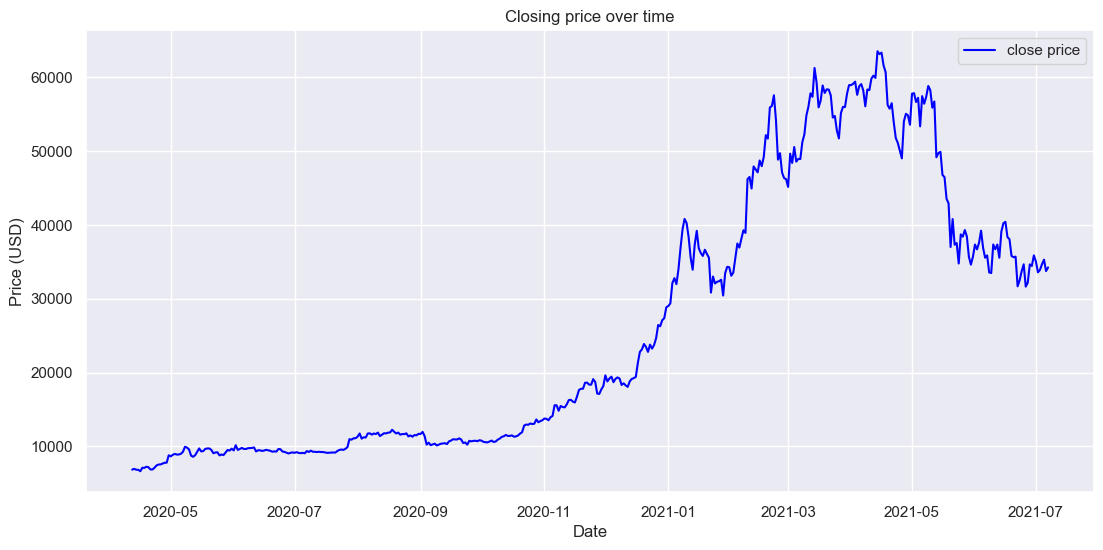

In [ ]:
#Price Trend for btc
plt.figure(figsize=(13,6))
plt.plot(merged['Date'], merged['btc_close'], label='close price', color="blue")
plt.title("Closing price over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

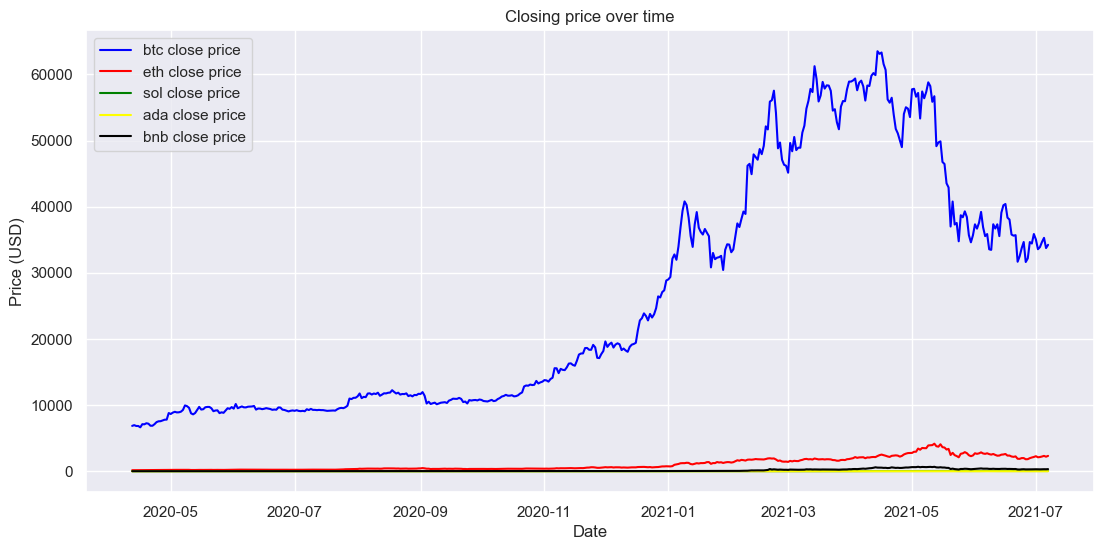

In [ ]:
#Price trend for all the coins
plt.figure(figsize=(13,6))
plt.plot(merged['Date'], merged['btc_close'], label='btc close price', color="blue")
plt.plot(merged['Date'], merged['eth_close'], label='eth close price', color="red")
plt.plot(merged['Date'], merged['sol_close'], label='sol close price', color="green")
plt.plot(merged['Date'], merged['ada_close'], label='ada close price', color="yellow")
plt.plot(merged['Date'], merged['bnb_close'], label='bnb close price', color="black")
plt.title("Closing price over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

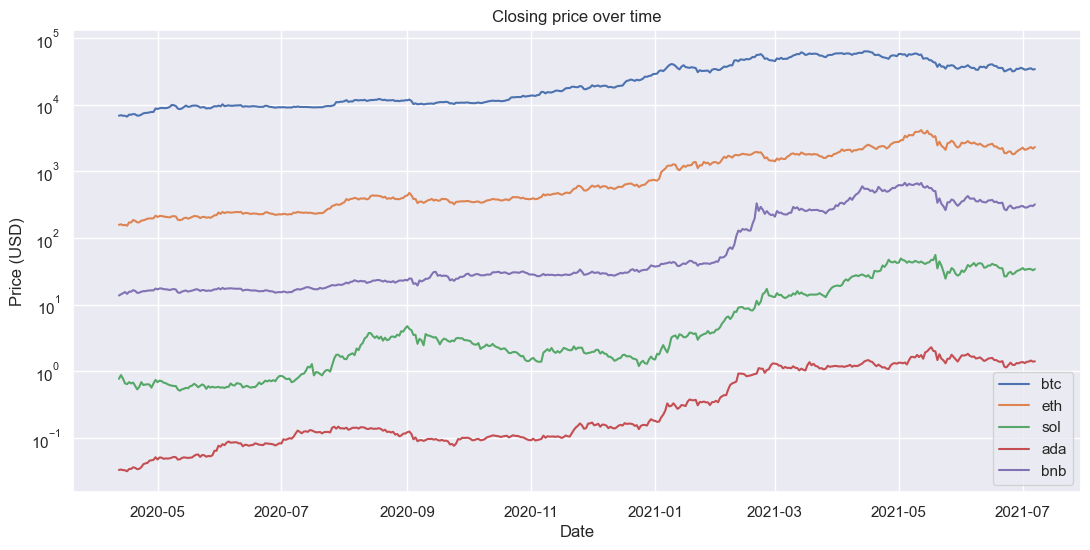

In [ ]:
#For better comparism price trend with log scaling
plt.figure(figsize=(13,6))
for coin in ['btc', 'eth','sol','ada','bnb']:
    plt.plot(merged["Date"], merged[f"{coin}_close"], label= coin)
plt.yscale("log")           #log scale
plt.title("Closing price over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

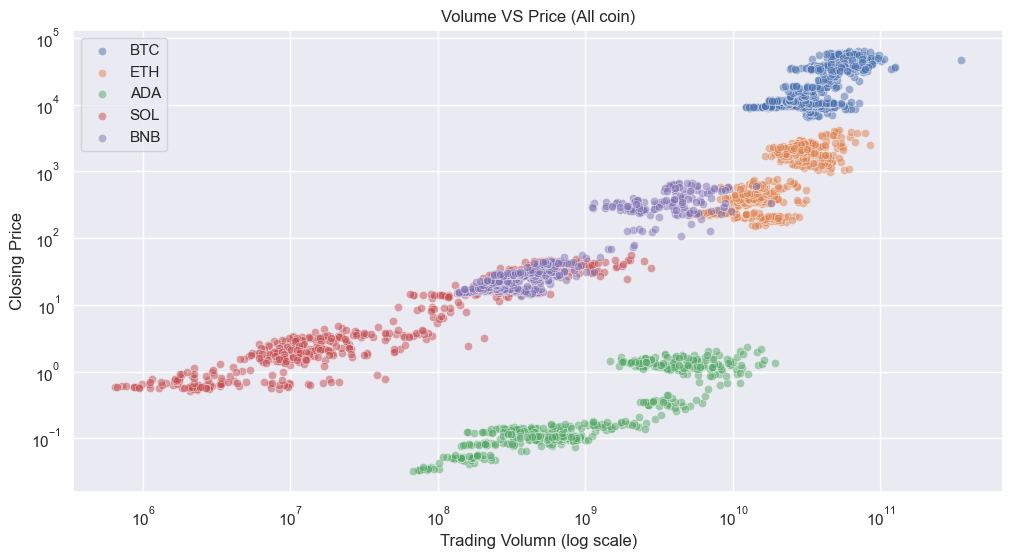

In [29]:
#Volume against Price, this shows if big price moves are backed by strong trading volume
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged, x="btc_volume", y="btc_close", alpha=0.5, label="BTC")
sns.scatterplot(data=merged, x="eth_volume", y="eth_close", alpha=0.5, label="ETH")
sns.scatterplot(data=merged, x="ada_volume", y="ada_close", alpha=0.5, label="ADA")
sns.scatterplot(data=merged, x="sol_volume", y="sol_close", alpha=0.5, label="SOL")
sns.scatterplot(data=merged, x="bnb_volume", y="bnb_close", alpha=0.5, label="BNB")

plt.xscale("log") #log scale since volumes are huge
plt.yscale("log") # log scale for price as well
plt.title("Volume VS Price (All coin)")
plt.xlabel("Trading Volumn (log scale)")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

Daily Return means how much the price changes compared to yesterday that where the .pct_change comes in
Daily Return is calculated as Dr=(TC-YC)/YC i.e Dr = Daily return; TC = Todays close; YC = Yesterdays close

In [ ]:
#daily_return for each coin 
daily_return = merged[['btc_close','eth_close','sol_close','ada_close','bnb_close']].pct_change()
print(daily_return.head())

   btc_close  eth_close  sol_close  ada_close  bnb_close
0        NaN        NaN        NaN        NaN        NaN
1   0.016330   0.018496   0.136053   0.013544   0.041351
2  -0.018082  -0.030177  -0.118611  -0.020682   0.045865
3  -0.000381   0.008426  -0.149013  -0.004008   0.032635
4  -0.029276  -0.027345  -0.023075  -0.033683  -0.059977


Volatility is how much the returns jump around, I'll using the standard deviation of daily returns

In [ ]:
#volatility(std)
volatility = daily_return.std()
print('daily volatility:')
print(volatility)

daily volatility:
btc_close    0.038438
eth_close    0.052490
sol_close    0.094507
ada_close    0.067046
bnb_close    0.070889
dtype: float64


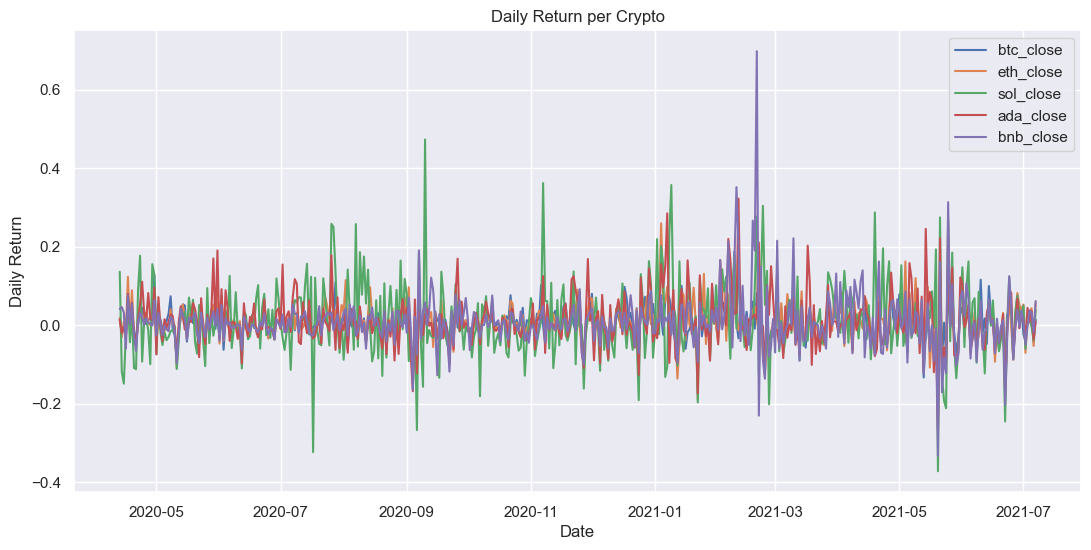

In [ ]:
#plot Daily return, this isn't really neccessary, oh well
plt.figure(figsize=(13,6))
for coin in daily_return.columns:
    plt.plot(merged["Date"], daily_return[coin], label= coin)
plt.title("Daily Return per Crypto")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

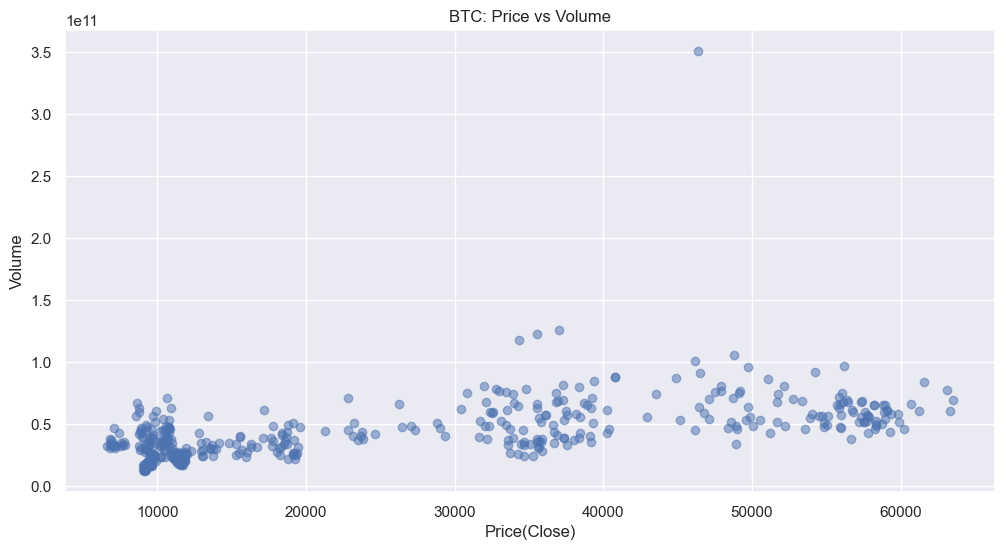

In [ ]:
#btc price vs Volume
plt.figure(figsize=(12, 6))
plt.scatter(merged['btc_close'],merged['btc_volume'], alpha=0.5)
plt.title("BTC: Price vs Volume")
plt.xlabel("Price(Close)")
plt.ylabel("Volume")
plt.show()

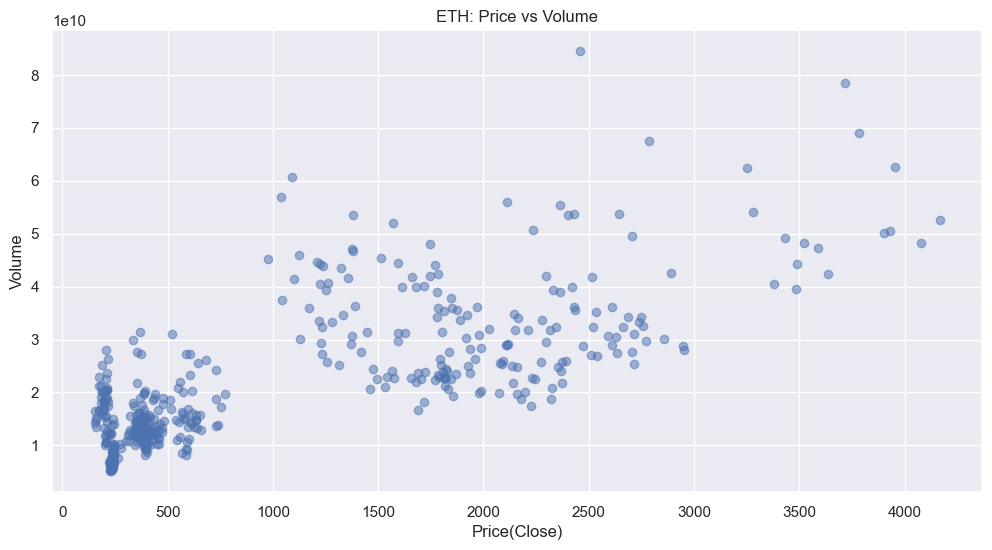

In [ ]:
#eth Price vs volume
plt.figure(figsize=(12, 6))
plt.scatter(merged['eth_close'],merged['eth_volume'], alpha=0.5)
plt.title("ETH: Price vs Volume")
plt.xlabel("Price(Close)")
plt.ylabel("Volume")
plt.show()

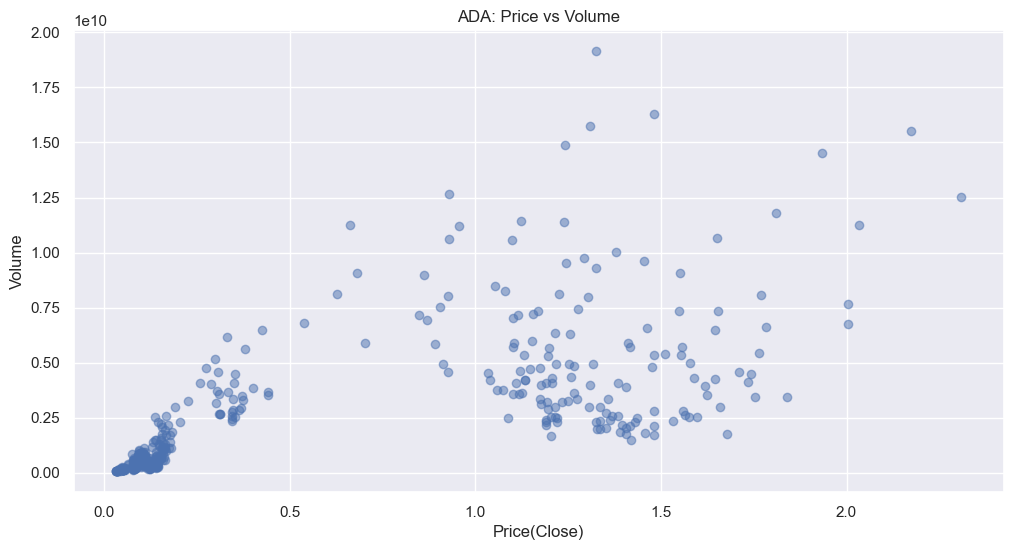

In [ ]:
#ada price vs Volume
plt.figure(figsize=(12, 6))
plt.scatter(merged['ada_close'],merged['ada_volume'], alpha=0.5)
plt.title("ADA: Price vs Volume")
plt.xlabel("Price(Close)")
plt.ylabel("Volume")
plt.show()

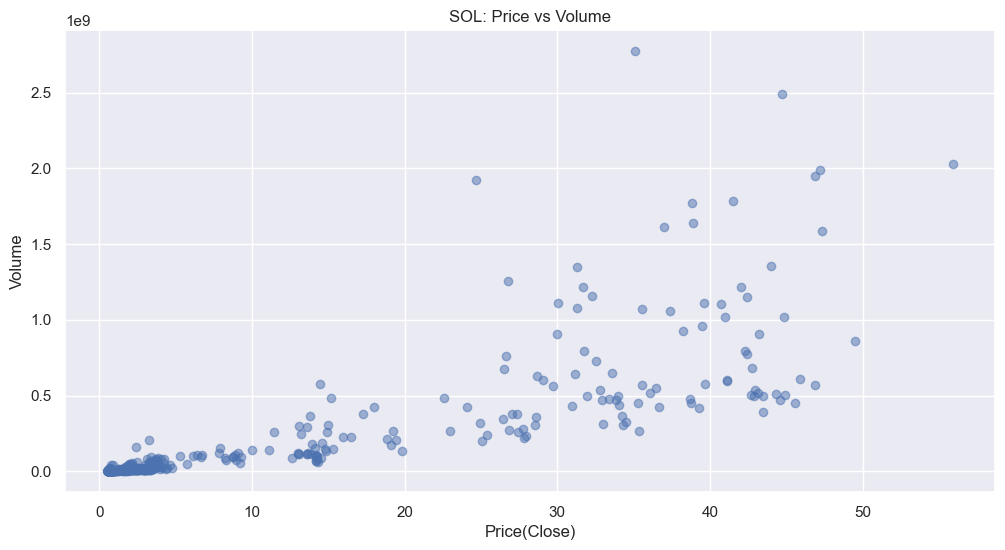

In [ ]:
#sol price vs Volume
plt.figure(figsize=(12, 6))
plt.scatter(merged['sol_close'],merged['sol_volume'], alpha=0.5)
plt.title("SOL: Price vs Volume")
plt.xlabel("Price(Close)")
plt.ylabel("Volume")
plt.show()

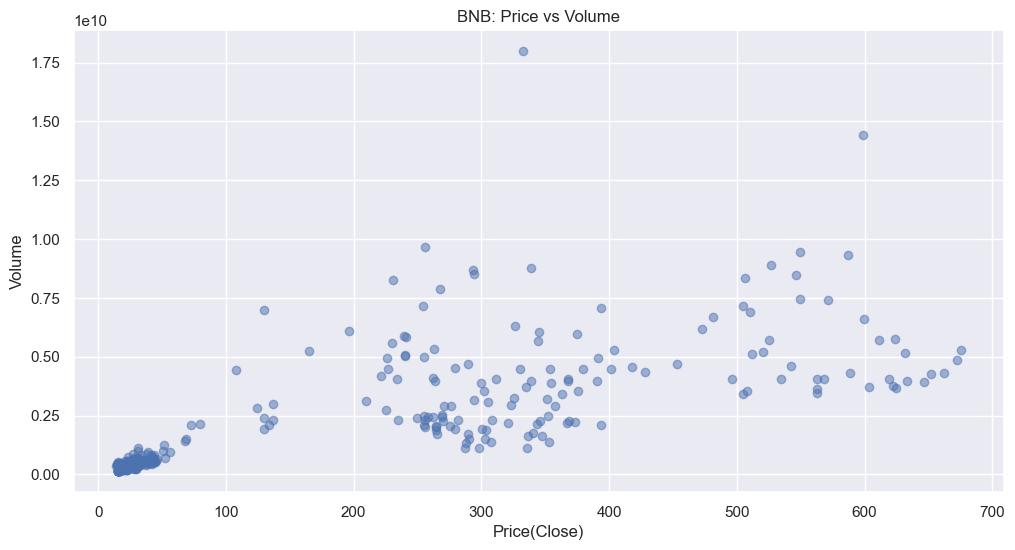

In [ ]:
#bnb price vs Volume
plt.figure(figsize=(12, 6))
plt.scatter(merged['bnb_close'],merged['bnb_volume'], alpha=0.5)
plt.title("BNB: Price vs Volume")
plt.xlabel("Price(Close)")
plt.ylabel("Volume")
plt.show()

This code will create a grid of scatter plots so we can quickly see price to volume pattern for all coins at once

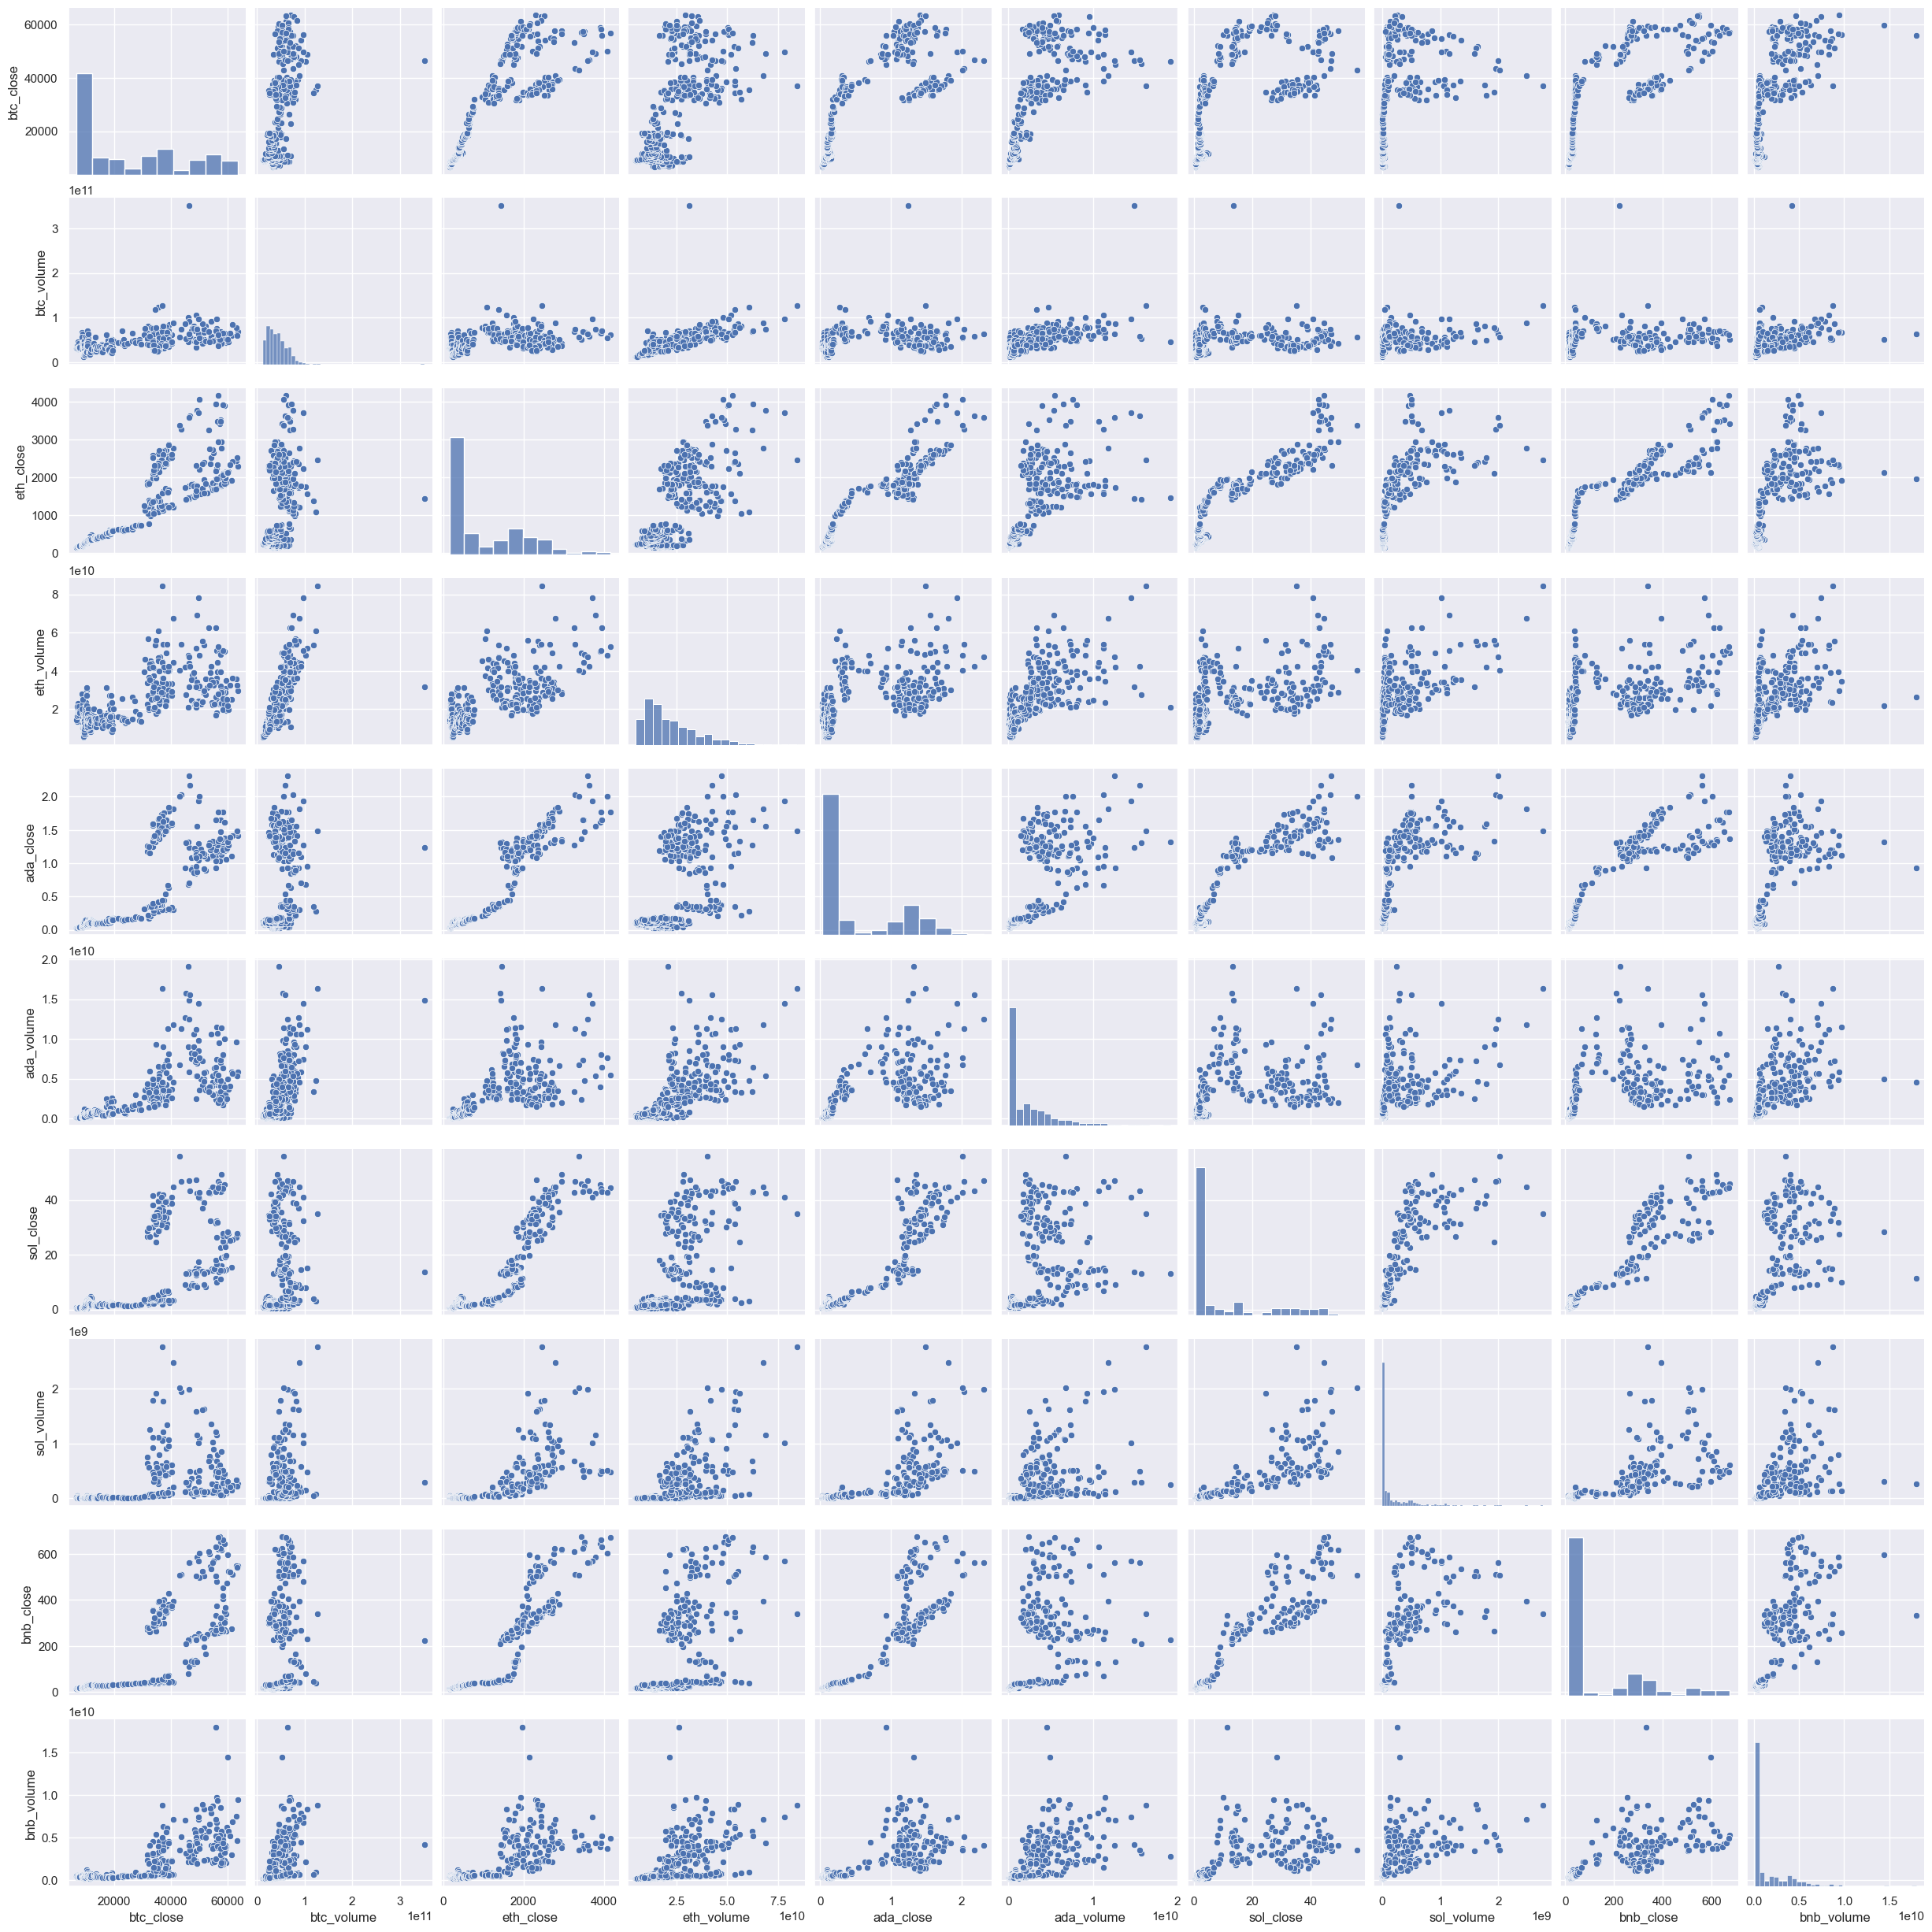

In [ ]:
#making a new df with just close and volume for each coin
pair = merged[['btc_close','btc_volume',
               'eth_close','eth_volume',
               'ada_close','ada_volume',
               'sol_close','sol_volume',
               'bnb_close','bnb_volume'
               ]]

sns.pairplot(pair, corner=False)

In [ ]:
#Correlation of daily returns
corr = daily_return.corr()
print('correlation between coins:')
print(corr)

correlation between coins:
           btc_close  eth_close  sol_close  ada_close  bnb_close
btc_close   1.000000   0.733625   0.317901   0.544019   0.564067
eth_close   0.733625   1.000000   0.466816   0.644027   0.578295
sol_close   0.317901   0.466816   1.000000   0.362122   0.423526
ada_close   0.544019   0.644027   0.362122   1.000000   0.484906
bnb_close   0.564067   0.578295   0.423526   0.484906   1.000000


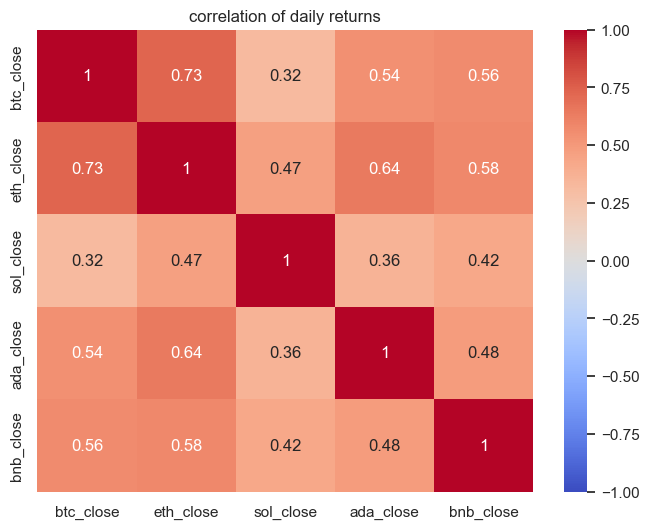

In [ ]:
#visualize the correlation with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap= 'coolwarm', vmin=-1, vmax=1)
plt.title('correlation of daily returns')
plt.show()